In [200]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [201]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0, 0.5, 'Package(in LPA)')

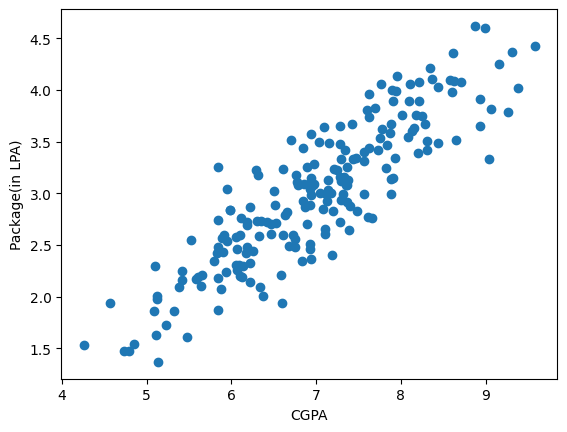

In [202]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel("Package(in LPA)")

## Model Building [Original]:

In [203]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [204]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [205]:
from sklearn.linear_model import LinearRegression

In [206]:
lr = LinearRegression()
lr.fit(X_train,y_train)   # Training

LinearRegression()

Text(0, 0.5, 'Package(in LPA)')

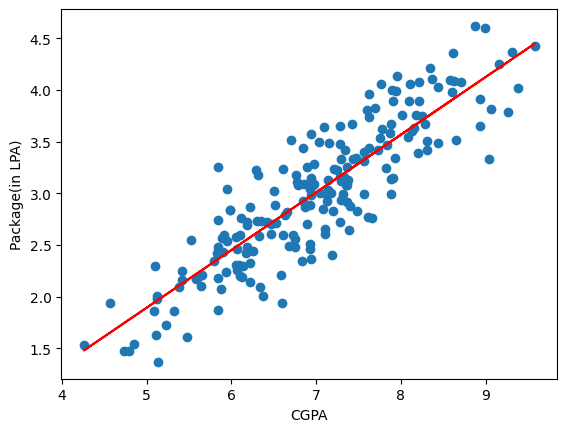

In [207]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train , lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel("Package(in LPA)")

## Evaluation Metrics :

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,root_mean_squared_error

In [209]:
y_pred = lr.predict(X_test)   # Predictions

In [210]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [211]:
print("MAE : ",mean_absolute_error(y_test,y_pred))
print("MSE : ",mean_squared_error(y_test,y_pred))
print("RMSE :",np.sqrt(mean_squared_error(y_test,y_pred)))

MAE :  0.2884710931878175
MSE :  0.12129235313495527
RMSE : 0.34827051717731616


In [212]:
r2 = r2_score(y_test,y_pred)
print("R2 Score : ",r2)

R2 Score :  0.780730147510384


In [213]:
X_test.shape

(40, 1)

### NOTE :

> Adjusted R2 Score = 1 - [ (1-R2) (n-1) / (n-1-k)]

`n` => No. of Rows , `k` => No. of Independent Features (Input Columns)

In [214]:
adj = 1 - ((1-r2)*(40-1)/(40-1-1))   # n=40 , k=1
print("Adjusted R2 Score :",adj)

Adjusted R2 Score : 0.7749598882343415


## Adding an Irrelevant Feature :

In [215]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)  # Adding a Random Column

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.316787,3.26
1,5.12,0.215560,1.98
2,7.82,0.868477,3.25
3,7.42,0.856835,3.67
4,6.94,0.517504,3.57


Text(0, 0.5, 'Package(in LPA)')

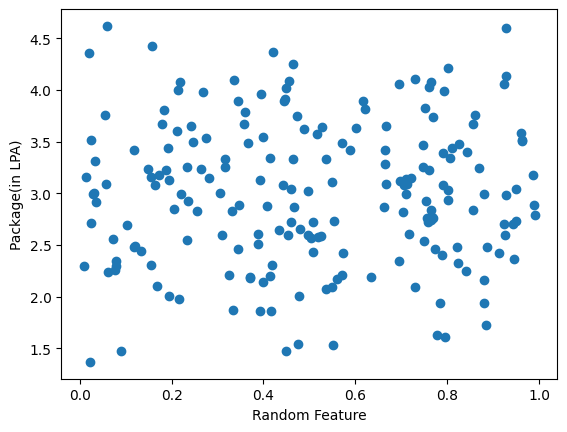

In [ ]:
plt.scatter(new_df1['random_feature'],new_df1['package'])   # Irrelevant Feature
plt.xlabel("Random Feature")
plt.ylabel("Package(in LPA)")

## Model Building :

In [217]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]
X.head()

,cgpa,random_feature
0,6.89,0.316787
1,5.12,0.215560
2,7.82,0.868477
3,7.42,0.856835
4,6.94,0.517504


In [218]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [219]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [220]:
y_pred = lr.predict(X_test)

In [221]:
r2 = r2_score(y_test,y_pred)    # Not much changes Visible
print("R2 Score : ",r2)

R2 Score :  0.7752054099047464


In [222]:
# It should be Reduced Compared to Original{Better metric than R2}

adj = 1 - ((1-r2)*(40-1)/(40-1-2))    # n=40 , k=2
print("Adjusted R2 Score :",adj)  

Adjusted R2 Score : 0.7630543509806786


## Adding a Relevant Feature :

In [223]:
new_df2 = df.copy()
new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]
new_df2.head()

,cgpa,iq,package
0,6.89,2.46,3.26
1,5.12,1.48,1.98
2,7.82,2.55,3.25
3,7.42,4.67,3.67
4,6.94,3.87,3.57


Text(0, 0.5, 'Package(in LPA)')

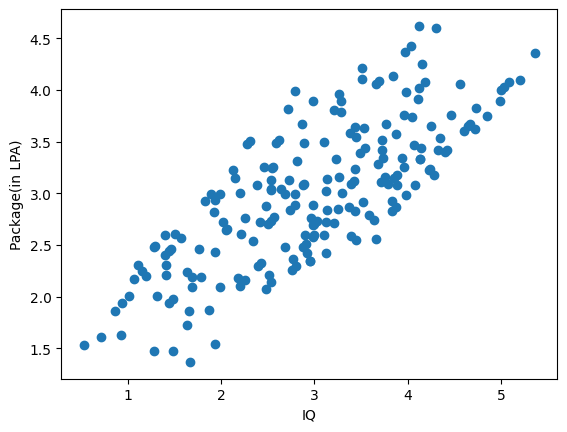

In [ ]:
plt.scatter(new_df2['iq'],new_df2['package'])  # Relevant Feature
plt.xlabel("IQ")
plt.ylabel("Package(in LPA)")

## Model Building :

In [225]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]
X.head()

,cgpa,iq
0,6.89,2.46
1,5.12,1.48
2,7.82,2.55
3,7.42,4.67
4,6.94,3.87


In [226]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [227]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [228]:
y_pred = lr.predict(X_test)

In [229]:
r2 = r2_score(y_test,y_pred)    
print("R2 Score : ",r2)

R2 Score :  0.8488211683957881


In [ ]:
# It should be Increased Compared to Original

adj = 1 - ((1-r2)*(40-1)/(40-1-2))    # n=40 , k=2
print("Adjusted R2 Score :",adj)  

Adjusted R2 Score : 0.8406493396604253
